In [45]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
import tensorboard
from keras.optimizers import SGD
import keras.backend as K

In [46]:
def read_csv(url):
    """
    Args:
        url (string): the url of the file
    Returns:
        df: the dataframe filled
    """
    df = pd.read_csv(url, header=None)
    df.head()
    return df

In [47]:
from sklearn.neighbors import RadiusNeighborsClassifier
def KnnAddedFeatures(X,Y):
    """
    Args :
        X, features, Y labels 
    Returns :
        tuples corresponding to new features

    """ 
    
    knn = RadiusNeighborsClassifier(radius=0.5, weights = 'distance')
    knn.fit(X,Y)
    a = knn.predict(X)
    print("coucou",a)
    
    

In [48]:
from sklearn.naive_bayes import MultinomialNB
def NaiveAddedFeatures(X,y):
    clf = MultinomialNB()
    clf.fit(abs(X), y)
    res = clf.predict_proba(X)
    return res
    

In [49]:
music_class_binary = {'BIG_BAND':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
          'BLUES_CONTEMPORARY':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
          'COUNTRY_TRADITIONAL': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
          'DANCE':               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
          'ELECTRONICA':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
          'EXPERIMENTAL':        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
          'FOLK_INTERNATIONAL':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
          'GOSPEL':              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          'GRUNGE_EMO':          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
          'HIP_HOP_RAP':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'JAZZ_CLASSIC':        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_ALTERNATIVE':   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_DEATH':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_HEAVY':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_CONTEMPORARY':    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_INDIE':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_LATIN':           [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'PUNK':                [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'REGGAE':              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'RNB_SOUL':            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_ALTERNATIVE':    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_COLLEGE':        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_CONTEMPORARY':   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_HARD':           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_NEO_PSYCHEDELIA':[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [61]:
music_class_discrete_to_binary = {1:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                                  2:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                                  3:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                                  4:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                  5:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                  6:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  7:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                  8:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                  9:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                 10:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 11:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 12:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 13:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 14:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 15:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 16:[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 17:[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 18:[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 19:[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 20:[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 21:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 22:[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 23:[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 24:[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 25:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [50]:
music_class = {'BIG_BAND':1,
          'BLUES_CONTEMPORARY':2,
          'COUNTRY_TRADITIONAL':3,
          'DANCE':4,
          'ELECTRONICA':5,
          'EXPERIMENTAL':6,
          'FOLK_INTERNATIONAL':7,
          'GOSPEL':8,
          'GRUNGE_EMO':9,
          'HIP_HOP_RAP':10,
          'JAZZ_CLASSIC':11,
          'METAL_ALTERNATIVE':12,
          'METAL_DEATH':13,
          'METAL_HEAVY':14,
          'POP_CONTEMPORARY':15,
          'POP_INDIE':16,
          'POP_LATIN':17,
          'PUNK':18,
          'REGGAE':19,
          'RNB_SOUL':20,
          'ROCK_ALTERNATIVE':21,
          'ROCK_COLLEGE':22,
          'ROCK_CONTEMPORARY':23,
          'ROCK_HARD':24,
          'ROCK_NEO_PSYCHEDELIA':25}

In [ ]:
music_class_discrete_to_binary

In [51]:
#Custom metrics function to calculate the F1 score
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [68]:
def CreateMultiPerceptron(nb_layers,nb_perceptron,nb_iteration,learning_rate,nb_essai,path):
    
    
    #Extraire les données des ensembles 
    dataset = read_csv(path)
    dataset.head()
    #print(dataset.shape[1])
    labels = dataset.loc[:,dataset.columns == (dataset.shape[1]-1)]
    labels = labels.to_numpy()
    y = []
    y_u = []
    for e in labels:
        y.append(music_class[e[0]])
    
    dataset = dataset.drop([0,1,(dataset.shape[1]-1)],axis=1)
    
    X = dataset.to_numpy()
    y = np.array(y)
    
    #Create a Multinomial Classifier
    mlt = MultinomialNB()
    
    #Train the classifier over all the samples
    mlt.fit(abs(X),y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    #Predict probabilities which will become new features over each data set
    nf_train = mlt.predict_proba(X_train)
    nf_test = mlt.predict_proba(X_test)
    
    #Use LDA to reduce the number of features
    # Create an LDA that will reduce the data down to 1 feature
    lda = LinearDiscriminantAnalysis(n_components=None)
    # run an LDA and use it to transform the features
    lda.fit(X_train, y_train)
    nb_components = select_n_components(lda.explained_variance_ratio_, 0.95)
    #print(nb_components)

    lda = LinearDiscriminantAnalysis(n_components=nb_components)
    lda.fit(X_train, y_train)
    X_train = lda.transform(X_train)
    X_test = lda.transform(X_test)
    
    # scale the data : réduire le execution time
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)
    
    #Add of new features 
    X_train = np.concatenate((X_train,nf_train),axis=1)
    X_test = np.concatenate((X_test,nf_test),axis=1)
    
    y_train_binary = []
    for e in y_train:
        y_train_binary.append(music_class_discrete_to_binary[e])
    
    y_train_binary = np.array(y_train_binary)
    

        
    y_test_binary = []
    for e in y_test:
        y_test_binary.append(music_class_discrete_to_binary[e])
        
    y_test_binary = np.array(y_test_binary)
    y_test = y_test_binary
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_binary, test_size=0.20)
    #X_val = scaling.transform(X_val)
    
    
    #Create the model 
    model = Sequential()
    #First hidden layer with specified number of percpetrons 
    model.add(Dense(units=nb_perceptron, activation='relu', input_dim = X_train.shape[1]))
    
    for i in range(nb_layers-1):
        #Next hidden layers with specified number of percpetrons 
        model.add(Dense(units=nb_perceptron, activation='relu'))
    
    #Last layer, the activation layer with 2 outputs
    model.add(Dense(units = 25, activation='softmax'))
    
    #Compile the model
    sgd = SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy',f1])
    
    #3. Entraîner 
    log_dir  = './logs/'+str(nb_essai)+'/nn_64'
    # On va utiliser Tensorboard pour visualizer le progrès de l'entraînement
    tb_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=nb_iteration, batch_size=100, callbacks=[tb_callback])
    
    # Plot training & validation accuracy values
    accuracy = pd.DataFrame(history.history['accuracy'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    print("Accuracy")
    print(accuracy.head(nb_iteration))
    
    # Plot training & validation loss values
    f1score = pd.DataFrame(history.history['f1'])
    plt.plot(history.history['f1'])
    plt.plot(history.history['val_f1'])
    plt.title('Model F1 score')
    plt.ylabel('F1 score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    print("F1 score")
    print(f1score.head(nb_iteration))
    
    
    #4 Evaluer le modèle
    score = model.evaluate(X_test, y_test)
    print("---TEST---")
    print(score)


Instructions for updating:
Use tf.cast instead.
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.8556 - accuracy: 0.1463 - f1: 4.6341e-04 - val_loss: 2.7901 - val_accuracy: 0.1614 - val_f1: 5.5005e-04
Epoch 2/100
114915/114915 [==============================] - 5s 42us/step - loss: 2.7747 - accuracy: 0.1672 - f1: 0.0025 - val_loss: 2.7641 - val_accuracy: 0.1687 - val_f1: 0.0012
Epoch 3/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.7555 - accuracy: 0.1714 - f1: 0.0044 - val_loss: 2.7502 - val_accuracy: 0.1715 - val_f1: 0.0055
Epoch 4/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.7445 - accuracy: 0.1747 - f1: 0.0060 - val_loss: 2.7541 - val_accuracy: 0.1716 - val_f1: 0.0071
Epoch 5/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.7359 - accuracy: 0.1769 - f1: 0.0076 - val_loss: 2.7430 - val_accuracy: 0.1760 - val_f1: 

114915/114915 [==============================] - 3s 27us/step - loss: 2.6308 - accuracy: 0.2030 - f1: 0.0324 - val_loss: 2.7270 - val_accuracy: 0.1820 - val_f1: 0.0254
Epoch 45/100
114915/114915 [==============================] - 3s 23us/step - loss: 2.6280 - accuracy: 0.2043 - f1: 0.0324 - val_loss: 2.7282 - val_accuracy: 0.1818 - val_f1: 0.0299
Epoch 46/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.6273 - accuracy: 0.2038 - f1: 0.0336 - val_loss: 2.7331 - val_accuracy: 0.1794 - val_f1: 0.0243
Epoch 47/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6258 - accuracy: 0.2039 - f1: 0.0323 - val_loss: 2.7295 - val_accuracy: 0.1841 - val_f1: 0.0279
Epoch 48/100
114915/114915 [==============================] - 2s 22us/step - loss: 2.6240 - accuracy: 0.2042 - f1: 0.0340 - val_loss: 2.7344 - val_accuracy: 0.1824 - val_f1: 0.0298
Epoch 49/100
114915/114915 [==============================] - 4s 35us/step - loss: 2.6223 - accuracy: 0.2059

114915/114915 [==============================] - 3s 28us/step - loss: 2.5737 - accuracy: 0.2178 - f1: 0.0479 - val_loss: 2.7846 - val_accuracy: 0.1784 - val_f1: 0.0367
Epoch 90/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5721 - accuracy: 0.2170 - f1: 0.0474 - val_loss: 2.7851 - val_accuracy: 0.1785 - val_f1: 0.0349
Epoch 91/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5716 - accuracy: 0.2172 - f1: 0.0481 - val_loss: 2.7965 - val_accuracy: 0.1770 - val_f1: 0.0328
Epoch 92/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5706 - accuracy: 0.2186 - f1: 0.0480 - val_loss: 2.7810 - val_accuracy: 0.1801 - val_f1: 0.0296
Epoch 93/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5689 - accuracy: 0.2192 - f1: 0.0485 - val_loss: 2.7896 - val_accuracy: 0.1786 - val_f1: 0.0392
Epoch 94/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5680 - accuracy: 0.2189

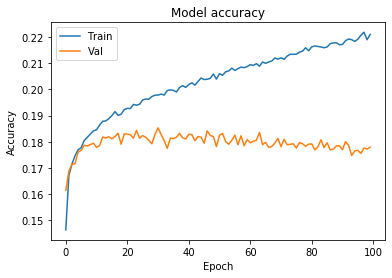

Accuracy
           0
0   0.146343
1   0.167184
2   0.171440
3   0.174660
4   0.176948
..       ...
95  0.219145
96  0.220685
97  0.221807
98  0.218962
99  0.220972

[100 rows x 1 columns]


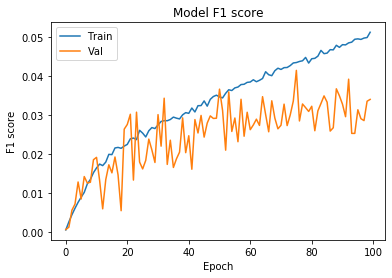

F1 score
           0
0   0.000463
1   0.002521
2   0.004380
3   0.006031
4   0.007558
..       ...
95  0.049566
96  0.049426
97  0.049770
98  0.049908
99  0.051269

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 20us/step
---TEST---
[2.7840754880445986, 0.17821837961673737, 0.03497135266661644]


In [69]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,1,"../music/music/tagged_feature_sets/msd-jmirmoments_dev/msd-jmirmoments_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.7504 - accuracy: 0.1811 - f1: 0.0529 - val_loss: 2.6824 - val_accuracy: 0.1994 - val_f1: 0.0662
Epoch 2/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.6486 - accuracy: 0.2066 - f1: 0.0664 - val_loss: 2.6464 - val_accuracy: 0.2076 - val_f1: 0.0657
Epoch 3/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.6276 - accuracy: 0.2110 - f1: 0.0715 - val_loss: 2.6217 - val_accuracy: 0.2110 - val_f1: 0.0949
Epoch 4/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.6146 - accuracy: 0.2135 - f1: 0.0755 - val_loss: 2.6091 - val_accuracy: 0.2137 - val_f1: 0.0804
Epoch 5/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.6074 - accuracy: 0.2150 - f1: 0.0774 - val_loss: 2.6111 - val_accuracy: 0.2142 - val_f1: 0.0835
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 28us/step - loss: 2.4932 - accuracy: 0.2429 - f1: 0.1025 - val_loss: 2.6141 - val_accuracy: 0.2170 - val_f1: 0.0948
Epoch 47/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4904 - accuracy: 0.2435 - f1: 0.1031 - val_loss: 2.6162 - val_accuracy: 0.2157 - val_f1: 0.0826
Epoch 48/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4879 - accuracy: 0.2438 - f1: 0.1040 - val_loss: 2.6208 - val_accuracy: 0.2162 - val_f1: 0.0918
Epoch 49/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4847 - accuracy: 0.2443 - f1: 0.1055 - val_loss: 2.6171 - val_accuracy: 0.2166 - val_f1: 0.0933
Epoch 50/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4831 - accuracy: 0.2457 - f1: 0.1047 - val_loss: 2.6223 - val_accuracy: 0.2177 - val_f1: 0.0943
Epoch 51/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4811 - accuracy: 0.2455

114915/114915 [==============================] - 3s 28us/step - loss: 2.4140 - accuracy: 0.2632 - f1: 0.1255 - val_loss: 2.6996 - val_accuracy: 0.2104 - val_f1: 0.1017
Epoch 92/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4127 - accuracy: 0.2636 - f1: 0.1268 - val_loss: 2.6927 - val_accuracy: 0.2088 - val_f1: 0.0971
Epoch 93/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4117 - accuracy: 0.2634 - f1: 0.1277 - val_loss: 2.6928 - val_accuracy: 0.2095 - val_f1: 0.0984
Epoch 94/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4099 - accuracy: 0.2648 - f1: 0.1285 - val_loss: 2.7090 - val_accuracy: 0.2065 - val_f1: 0.0982
Epoch 95/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4086 - accuracy: 0.2648 - f1: 0.1274 - val_loss: 2.7038 - val_accuracy: 0.2093 - val_f1: 0.0989
Epoch 96/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4077 - accuracy: 0.2654

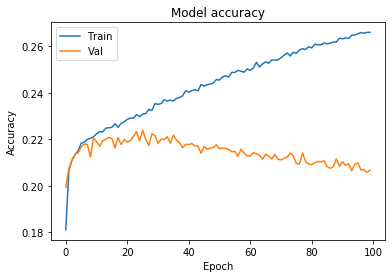

Accuracy
           0
0   0.181073
1   0.206640
2   0.210999
3   0.213506
4   0.215020
..       ...
95  0.265379
96  0.265927
97  0.265622
98  0.265979
99  0.266058

[100 rows x 1 columns]


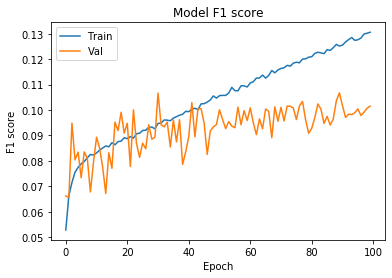

F1 score
           0
0   0.052857
1   0.066350
2   0.071480
3   0.075547
4   0.077429
..       ...
95  0.127610
96  0.128286
97  0.129866
98  0.130198
99  0.130574

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 21us/step
---TEST---
[2.7500749164939386, 0.20294617116451263, 0.09249886125326157]


In [70]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,2,"../music/music/tagged_feature_sets/msd-mvd_dev/msd-mvd_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.5383 - accuracy: 0.2268 - f1: 0.0641 - val_loss: 2.4386 - val_accuracy: 0.2563 - val_f1: 0.0961
Epoch 2/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4269 - accuracy: 0.2563 - f1: 0.0953 - val_loss: 2.4322 - val_accuracy: 0.2556 - val_f1: 0.0868
Epoch 3/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4075 - accuracy: 0.2617 - f1: 0.1017 - val_loss: 2.4075 - val_accuracy: 0.2644 - val_f1: 0.1008
Epoch 4/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.3953 - accuracy: 0.2639 - f1: 0.1048 - val_loss: 2.4022 - val_accuracy: 0.2645 - val_f1: 0.0944
Epoch 5/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.3851 - accuracy: 0.2677 - f1: 0.1081 - val_loss: 2.4020 - val_accuracy: 0.2650 - val_f1: 0.0986
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 27us/step - loss: 2.2120 - accuracy: 0.3102 - f1: 0.1513 - val_loss: 2.4523 - val_accuracy: 0.2615 - val_f1: 0.1305
Epoch 47/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.2084 - accuracy: 0.3108 - f1: 0.1541 - val_loss: 2.4520 - val_accuracy: 0.2642 - val_f1: 0.1399
Epoch 48/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.2061 - accuracy: 0.3134 - f1: 0.1550 - val_loss: 2.4588 - val_accuracy: 0.2604 - val_f1: 0.1307
Epoch 49/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.2034 - accuracy: 0.3133 - f1: 0.1551 - val_loss: 2.4654 - val_accuracy: 0.2607 - val_f1: 0.1329
Epoch 50/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.2016 - accuracy: 0.3140 - f1: 0.1570 - val_loss: 2.4615 - val_accuracy: 0.2583 - val_f1: 0.1224
Epoch 51/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.1975 - accuracy: 0.3154

114915/114915 [==============================] - 3s 27us/step - loss: 2.1141 - accuracy: 0.3373 - f1: 0.1885 - val_loss: 2.5639 - val_accuracy: 0.2503 - val_f1: 0.1416
Epoch 92/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.1124 - accuracy: 0.3377 - f1: 0.1888 - val_loss: 2.5626 - val_accuracy: 0.2481 - val_f1: 0.1359
Epoch 93/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.1109 - accuracy: 0.3381 - f1: 0.1905 - val_loss: 2.5629 - val_accuracy: 0.2478 - val_f1: 0.1387
Epoch 94/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.1102 - accuracy: 0.3377 - f1: 0.1901 - val_loss: 2.5685 - val_accuracy: 0.2516 - val_f1: 0.1407
Epoch 95/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.1089 - accuracy: 0.3390 - f1: 0.1912 - val_loss: 2.5617 - val_accuracy: 0.2505 - val_f1: 0.1427
Epoch 96/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.1073 - accuracy: 0.3389

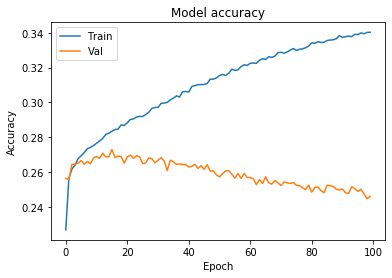

Accuracy
           0
0   0.226759
1   0.256311
2   0.261750
3   0.263926
4   0.267650
..       ...
95  0.338929
96  0.339860
97  0.339364
98  0.340147
99  0.340243

[100 rows x 1 columns]


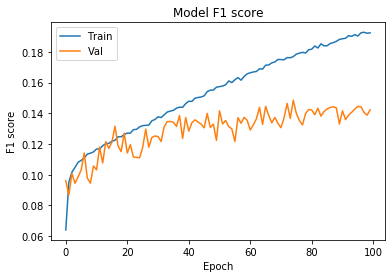

F1 score
           0
0   0.064079
1   0.095275
2   0.101671
3   0.104784
4   0.108098
..       ...
95  0.190239
96  0.192351
97  0.192720
98  0.192069
99  0.192332

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 19us/step
---TEST---
[2.5800703785240273, 0.250730961561203, 0.14453494548797607]


In [71]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,3,"../music/music/tagged_feature_sets/msd-ssd_dev/msd-ssd_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.7996 - accuracy: 0.1540 - f1: 0.0036 - val_loss: 2.7332 - val_accuracy: 0.1690 - val_f1: 0.0013
Epoch 2/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6893 - accuracy: 0.1796 - f1: 0.0101 - val_loss: 2.7010 - val_accuracy: 0.1783 - val_f1: 0.0068
Epoch 3/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.6713 - accuracy: 0.1837 - f1: 0.0133 - val_loss: 2.6541 - val_accuracy: 0.1898 - val_f1: 0.0104
Epoch 4/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6578 - accuracy: 0.1863 - f1: 0.0149 - val_loss: 2.6508 - val_accuracy: 0.1903 - val_f1: 0.0211
Epoch 5/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.6464 - accuracy: 0.1907 - f1: 0.0184 - val_loss: 2.6633 - val_accuracy: 0.1891 - val_f1: 0.0063
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 27us/step - loss: 2.5167 - accuracy: 0.2241 - f1: 0.0465 - val_loss: 2.5839 - val_accuracy: 0.2087 - val_f1: 0.0414
Epoch 47/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5162 - accuracy: 0.2246 - f1: 0.0463 - val_loss: 2.6056 - val_accuracy: 0.2053 - val_f1: 0.0382
Epoch 48/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.5139 - accuracy: 0.2251 - f1: 0.0466 - val_loss: 2.5816 - val_accuracy: 0.2123 - val_f1: 0.0439
Epoch 49/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.5120 - accuracy: 0.2249 - f1: 0.0473 - val_loss: 2.5803 - val_accuracy: 0.2132 - val_f1: 0.0373
Epoch 50/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5094 - accuracy: 0.2265 - f1: 0.0474 - val_loss: 2.5874 - val_accuracy: 0.2094 - val_f1: 0.0383
Epoch 51/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5084 - accuracy: 0.2268

114915/114915 [==============================] - 3s 26us/step - loss: 2.4550 - accuracy: 0.2402 - f1: 0.0661 - val_loss: 2.6124 - val_accuracy: 0.2064 - val_f1: 0.0592
Epoch 92/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4541 - accuracy: 0.2420 - f1: 0.0661 - val_loss: 2.6066 - val_accuracy: 0.2110 - val_f1: 0.0597
Epoch 93/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4518 - accuracy: 0.2403 - f1: 0.0653 - val_loss: 2.6063 - val_accuracy: 0.2114 - val_f1: 0.0604
Epoch 94/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4511 - accuracy: 0.2416 - f1: 0.0666 - val_loss: 2.6090 - val_accuracy: 0.2090 - val_f1: 0.0544
Epoch 95/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4494 - accuracy: 0.2417 - f1: 0.0671 - val_loss: 2.6158 - val_accuracy: 0.2106 - val_f1: 0.0533
Epoch 96/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4482 - accuracy: 0.2424

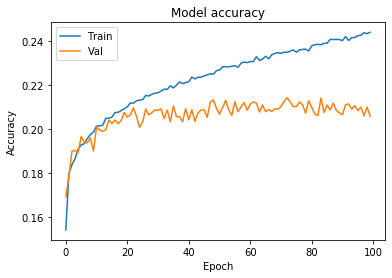

Accuracy
           0
0   0.153983
1   0.179568
2   0.183692
3   0.186329
4   0.190663
..       ...
95  0.242440
96  0.242692
97  0.243832
98  0.243406
99  0.244033

[100 rows x 1 columns]


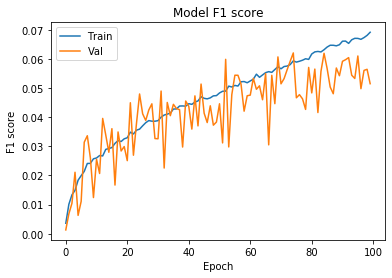

F1 score
           0
0   0.003592
1   0.010110
2   0.013337
3   0.014879
4   0.018370
..       ...
95  0.067045
96  0.066734
97  0.067323
98  0.068084
99  0.069159

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 16us/step
---TEST---
[2.597404662464194, 0.2117457091808319, 0.055021174252033234]


In [72]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,4,"../music/music/tagged_feature_sets/msd-jmirspectral_dev/msd-jmirspectral_dev.csv") 

In [ ]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,5,"../music/music/tagged_feature_sets/msd-jmirmfccs_dev/msd-jmirmfccs_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 23us/step - loss: 2.7976 - accuracy: 0.1601 - f1: 0.0067 - val_loss: 2.6695 - val_accuracy: 0.1908 - val_f1: 0.0124
Epoch 2/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.6432 - accuracy: 0.1992 - f1: 0.0256 - val_loss: 2.6531 - val_accuracy: 0.1909 - val_f1: 0.0187
Epoch 3/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.6163 - accuracy: 0.2074 - f1: 0.0325 - val_loss: 2.6074 - val_accuracy: 0.2078 - val_f1: 0.0360
Epoch 4/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.6052 - accuracy: 0.2100 - f1: 0.0363 - val_loss: 2.5983 - val_accuracy: 0.2087 - val_f1: 0.0348
Epoch 5/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5973 - accuracy: 0.2111 - f1: 0.0395 - val_loss: 2.6059 - val_accuracy: 0.2066 - val_f1: 0.0345
Epoch 6/100
114915/114915 [======================

In [ ]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,6,"../music/music/tagged_feature_sets/msd-trh_dev/msd-trh_dev.csv") 

In [ ]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,7,"../music/music/tagged_feature_sets/msd-jmirlpc_dev/msd-jmirlpc_dev.csv") 

In [ ]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,8,"../music/music/tagged_feature_sets/msd-rh_dev_new/msd-rh_dev_new.csv") 

In [ ]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,9,"../music/music/tagged_feature_sets/msd-jmirderivatives_dev/msd-jmirderivatives_dev.csv") 

In [ ]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,10,"../music/music/tagged_feature_sets/msd-marsyas_dev_new/msd-marsyas_dev_new.csv") 